In [5]:
import numpy as np
arr = np.diag([0, 0, 0, 0, 0])
for i in range(5):
    arr[i][i-1]=i
print(arr)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


In [12]:
arr_2 = np.random.random((10, 3))
print(arr_2[range(10), np.abs(arr_2 - 0.5).argmin(axis=1)])

[[0.03618928 0.07015046 0.67947044]
 [0.11198642 0.74326241 0.26041172]
 [0.68833026 0.28292925 0.7114083 ]
 [0.26954196 0.07633924 0.05263998]
 [0.4939131  0.57640473 0.77555538]
 [0.63986607 0.31656516 0.86176802]
 [0.51311602 0.11464957 0.10515494]
 [0.86703261 0.97517666 0.98693645]
 [0.60709502 0.48097415 0.18998954]
 [0.85526007 0.23672767 0.51843585]]
[0.67947044 0.26041172 0.68833026 0.26954196 0.4939131  0.63986607
 0.51311602 0.86703261 0.48097415 0.51843585]


In [14]:
arr_3 = np.random.rand(36).reshape(6, 6)
print(np.sum(arr_3,1)/np.min(arr_3,0))

[[0.03618928 0.07015046 0.67947044]
 [0.11198642 0.74326241 0.26041172]
 [0.68833026 0.28292925 0.7114083 ]
 [0.26954196 0.07633924 0.05263998]
 [0.4939131  0.57640473 0.77555538]
 [0.63986607 0.31656516 0.86176802]
 [0.51311602 0.11464957 0.10515494]
 [0.86703261 0.97517666 0.98693645]
 [0.60709502 0.48097415 0.18998954]
 [0.85526007 0.23672767 0.51843585]]
[  8.22778581  33.2382936  168.44001155  38.82619825  34.2816181
  17.91939686]


In [16]:
arr_4 = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(np.max(arr_4[1:][(arr_4==0)[:-1]]))

5


In [17]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
print(x + np.bincount(i, minlength = len(x)));

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [20]:
print(np.rint([-5.5, 5.5]))
print(np.trunc([-5.5, 5.5]))
print(np.around([0.1, 0.9, 1.2, 1.8]))
print(np.round([0.1, 0.9, 1.2, 1.8]))

[-6.  6.]
[-5.  5.]
[0. 1. 1. 2.]
[0. 1. 1. 2.]


In [ ]:
from sklearn.datasets import fetch_openml

#Загрузка может занять около минуты
images, labels = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

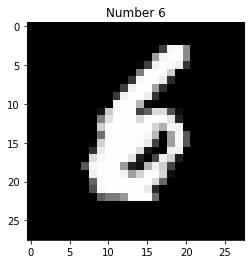

In [8]:
import matplotlib.pyplot as plt

i = 129
plt.imshow(images[i].reshape(28, 28), cmap='Greys_r')
plt.title('Number ' + labels[i])
plt.show()

In [ ]:
test_size = 100
test_images = images[-test_size:]
test_labels = labels[-test_size:]

In [ ]:
train_size = 1000
train_images = images[:train_size]
train_labels = labels[:train_size]

In [110]:

def kNN(train_X, train_Y, test_X, k):
    return  np.vectorize(lambda ii: str(np.bincount(train_Y[np.argsort(np.vectorize(lambda i, j: np.linalg.norm(test_X[i]-train_X[j]))(ii, range(1000)))[:k]].astype(int)).argmax()))(range(len(test_X)))

kNN(train_images, train_labels, test_images, 3), kNN(train_images, train_labels, test_images, 4)

(array(['8', '9', '0', '1', '5', '7', '4', '5', '6', '7', '8', '0', '1',
        '2', '3', '4', '7', '8', '9', '7', '8', '6', '9', '1', '4', '5',
        '8', '4', '4', '7', '0', '1', '9', '2', '8', '7', '8', '2', '6',
        '0', '6', '5', '3', '3', '9', '9', '1', '4', '0', '6', '1', '0',
        '0', '6', '2', '1', '1', '7', '7', '3', '4', '6', '0', '7', '0',
        '3', '6', '8', '7', '1', '5', '2', '4', '9', '4', '3', '6', '4',
        '1', '7', '2', '6', '6', '0', '1', '7', '3', '4', '5', '6', '7',
        '8', '9', '0', '1', '2', '3', '9', '5', '6'], dtype='<U1'),
 array(['8', '9', '0', '1', '5', '7', '4', '5', '6', '7', '8', '0', '1',
        '2', '3', '4', '7', '8', '9', '7', '8', '6', '9', '1', '4', '5',
        '8', '4', '4', '7', '0', '1', '9', '2', '8', '7', '8', '2', '6',
        '0', '6', '5', '3', '3', '9', '9', '1', '4', '0', '6', '1', '0',
        '0', '6', '2', '1', '1', '7', '7', '5', '4', '6', '0', '7', '0',
        '3', '6', '8', '7', '1', '5', '2', '4', '9', '4'

In [111]:
def accuracy(test_Y, lst):
    c = 0
    for i in range(len(test_Y)):
        if test_Y[i] == lst[i]:
            c += 1
    return c/len(test_Y)

accuracy(test_labels, kNN(train_images, train_labels, test_images, 3))

0.9

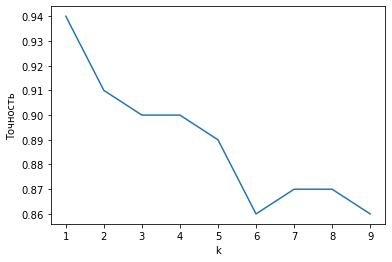

In [113]:
l = []
for i in range(1, 10):
    l.append(accuracy(test_labels, kNN(train_images, train_labels, test_images, i)))

plt.xlabel('k')
plt.ylabel('Точность')
plt.plot(range(1, 10), l)


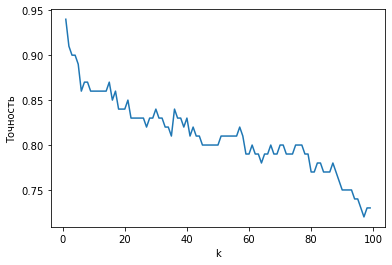

In [114]:
l = []
for i in range(1, 100):
    l.append(accuracy(test_labels, kNN(train_images, train_labels, test_images, i)))

plt.xlabel('k')
plt.ylabel('Точность')
plt.plot(range(1, 100), l)

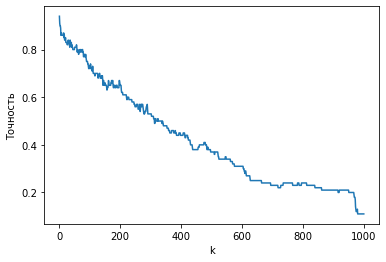

In [115]:
l = []
for i in range(1, 1000):
    l.append(accuracy(test_labels, kNN(train_images, train_labels, test_images, i)))

plt.xlabel('k')
plt.ylabel('Точность')
plt.plot(range(1, 1000), l)